In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_excel('state_month_overdose.xlsx')

In [45]:
df.head()

,State,State Code,Month,Month Code,Deaths,Population,Crude Rate
0,Alabama,1,"Jan., 2015",2015/01,29,Not Applicable,Not Applicable
1,Alabama,1,"Feb., 2015",2015/02,24,Not Applicable,Not Applicable
2,Alabama,1,"Mar., 2015",2015/03,37,Not Applicable,Not Applicable
3,Alabama,1,"Apr., 2015",2015/04,29,Not Applicable,Not Applicable
4,Alabama,1,"May, 2015",2015/05,21,Not Applicable,Not Applicable


In [46]:
df.dtypes

State         object
State Code     int64
Month         object
Month Code    object
Deaths        object
Population    object
Crude Rate    object
dtype: object

In [47]:
df.isna().sum() #no null values

State         0
State Code    0
Month         0
Month Code    0
Deaths        0
Population    0
Crude Rate    0
dtype: int64

In [48]:
df['Deaths'] = df['Deaths'].apply(lambda x: 0 if x == 'Suppressed' else int(x))

In [49]:
df.head()

,State,State Code,Month,Month Code,Deaths,Population,Crude Rate
0,Alabama,1,"Jan., 2015",2015/01,29,Not Applicable,Not Applicable
1,Alabama,1,"Feb., 2015",2015/02,24,Not Applicable,Not Applicable
2,Alabama,1,"Mar., 2015",2015/03,37,Not Applicable,Not Applicable
3,Alabama,1,"Apr., 2015",2015/04,29,Not Applicable,Not Applicable
4,Alabama,1,"May, 2015",2015/05,21,Not Applicable,Not Applicable


In [50]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

/tmp/ipykernel_57328/3903996341.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


In [51]:
df.head()

,State,State Code,Month Code,Deaths,Population,Crude Rate
Month,,,,,,
2015-01-01,Alabama,1,2015/01,29,Not Applicable,Not Applicable
2015-02-01,Alabama,1,2015/02,24,Not Applicable,Not Applicable
2015-03-01,Alabama,1,2015/03,37,Not Applicable,Not Applicable
2015-04-01,Alabama,1,2015/04,29,Not Applicable,Not Applicable
2015-05-01,Alabama,1,2015/05,21,Not Applicable,Not Applicable


In [52]:
# monthly_deaths = df.groupby(['State', 'Month']).agg({'Deaths': 'sum'}).reset_index()
# monthly_deaths = df.groupby(['Month', 'State']).agg({'Deaths': 'sum'}).reset_index()
monthly_deaths = df.groupby(['Month']).agg({'Deaths': 'sum'}).reset_index()

In [53]:
# monthly_deaths['Lag_1'] = monthly_deaths['Deaths'].shift(1)
# monthly_deaths['Rolling_Mean_3'] = monthly_deaths['Deaths'].rolling(window=3).mean()

In [54]:
monthly_deaths

,Month,Deaths
0,2015-01-01,2771
1,2015-02-01,2627
2,2015-03-01,2907
3,2015-04-01,2822
4,2015-05-01,2850
...,...,...
67,2020-08-01,6165
68,2020-09-01,5683
69,2020-10-01,5613
70,2020-11-01,5613


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

Epoch 1/200


/home/sukikrishna/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10015534.0000 
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8241764.5000
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5481739.5000 
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 3579027.2500
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 1916626.5000
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 770300.3125 
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 221819.2344
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104632.8984
Epoch 9/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43514.3867
Epoch 10/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33080.8828
Epoch 11/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27659.4199
Epoch 12/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47274.3594 
Epoch 13/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49593.7109
Epoch 14/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38753.1641
Epo

/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


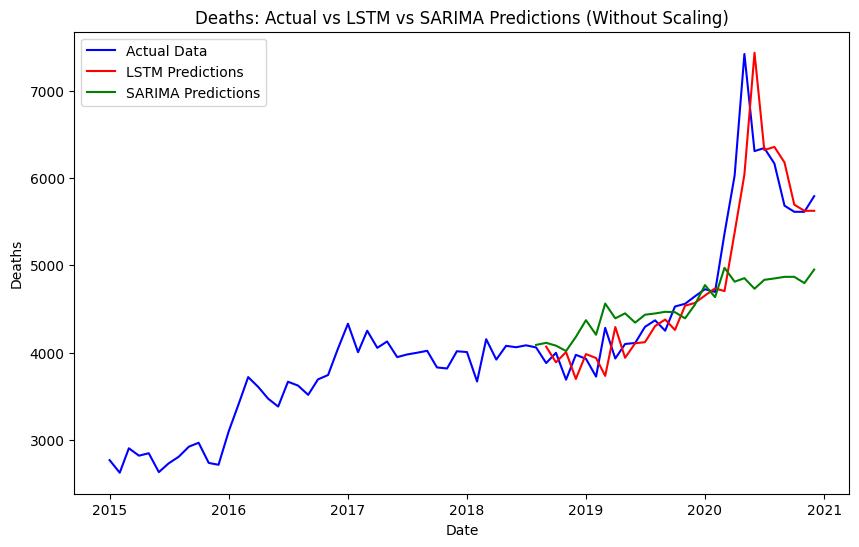

In [56]:
df = monthly_deaths.copy()
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Split into training and testing
train_size = int(len(df) * 0.6)
train, test = df[:train_size], df[train_size:]

# LSTM Model Preparation (without scaling)
def create_sequences(data, seq_length=1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 1  # You can change this depending on how many previous steps you want to use
X_train, y_train = create_sequences(train['Deaths'].values, seq_length)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

# Prepare test data for LSTM (no scaling)
X_test, y_test = create_sequences(test['Deaths'].values, seq_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM predictions (no scaling required)
lstm_predictions = lstm_model.predict(X_test)

# 2. SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Make predictions with SARIMA
sarima_predictions = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# 3. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Deaths'], label='Actual Data', color='blue')
plt.plot(test.index[1:], lstm_predictions, label='LSTM Predictions', color='red')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.title('Deaths: Actual vs LSTM vs SARIMA Predictions (Without Scaling)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

# Calculate RMSE
# lstm_rmse = np.sqrt(mean_squared_error(test[1:], lstm_predictions))
# sarima_rmse = np.sqrt(mean_squared_error(test, sarima_predictions))
# print(f'LSTM RMSE: {lstm_rmse}')
# print(f'SARIMA RMSE: {sarima_rmse}')

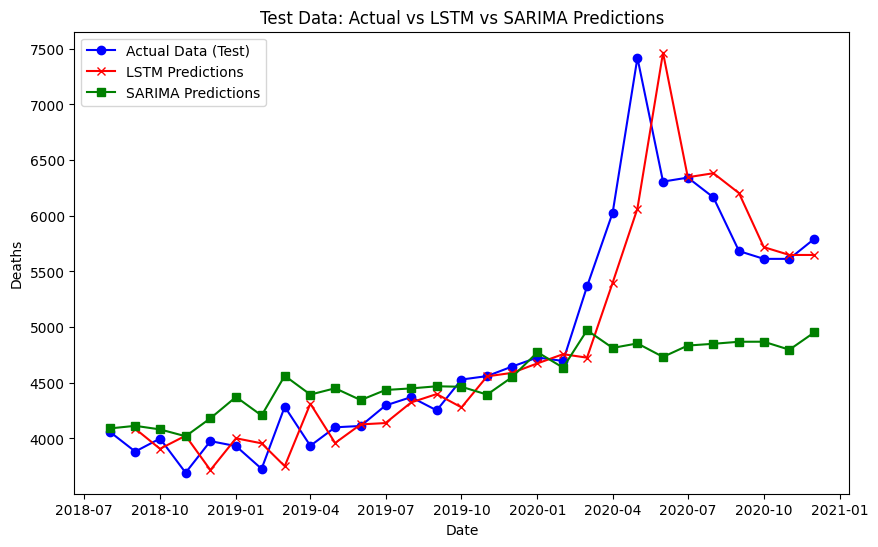

In [15]:
# 3. Plot only the test data and predictions (without showing training data)
plt.figure(figsize=(10, 6))

# Plot actual test data
plt.plot(test.index, test['Deaths'], label='Actual Data (Test)', color='blue', marker='o')

# Plot LSTM predictions (shift to align with test data indices)
plt.plot(test.index[1:], lstm_predictions, label='LSTM Predictions', color='red', marker='x')

# Plot SARIMA predictions
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='green', marker='s')

# Formatting the plot
plt.title('Test Data: Actual vs LSTM vs SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [62]:
df

,Deaths
Month,
2015-01-01,2771
2015-02-01,2627
2015-03-01,2907
2015-04-01,2822
2015-05-01,2850
...,...
2020-08-01,6165
2020-09-01,5683
2020-10-01,5613


In [64]:
# Split into training and testing
train_size = int(len(df) * 0.85)
train_size

61

Epoch 1/200


/home/sukikrishna/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14068470.0000 
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11474328.0000
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 9256007.0000
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6195359.5000
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4255020.5000
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2068192.3750  
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 903961.0000
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 269090.6250
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 98588.7109
Epoch 10/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51321.5859
Epoch 11/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45809.2812
Epoch 12/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32452.8398
Epoch 13/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 36197.3516
Epoch 14/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 40233.582

/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


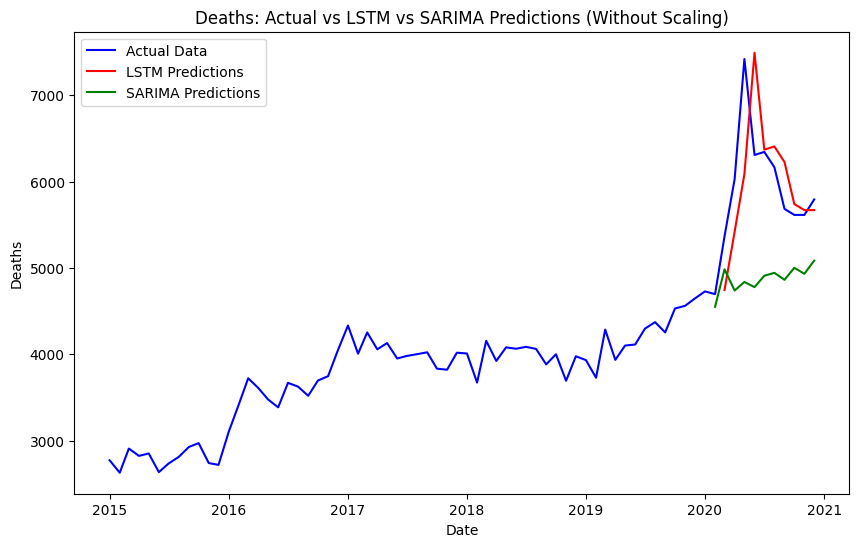

In [65]:
df = monthly_deaths.copy()
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Split into training and testing
train_size = int(len(df) * 0.85)
train, test = df[:train_size], df[train_size:]

# LSTM Model Preparation (without scaling)
def create_sequences(data, seq_length=1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 1  # You can change this depending on how many previous steps you want to use
X_train, y_train = create_sequences(train['Deaths'].values, seq_length)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

# Prepare test data for LSTM (no scaling)
X_test, y_test = create_sequences(test['Deaths'].values, seq_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM predictions (no scaling required)
lstm_predictions = lstm_model.predict(X_test)

# 2. SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Make predictions with SARIMA
sarima_predictions = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# 3. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Deaths'], label='Actual Data', color='blue')
plt.plot(test.index[1:], lstm_predictions, label='LSTM Predictions', color='red')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.title('Deaths: Actual vs LSTM vs SARIMA Predictions (Without Scaling)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [66]:
# Calculate RMSE
lstm_rmse = np.sqrt(mean_squared_error(test[1:], lstm_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_predictions))
print(f'LSTM RMSE: {lstm_rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')

LSTM RMSE: 657.610038432613
SARIMA RMSE: 1221.4723195311076


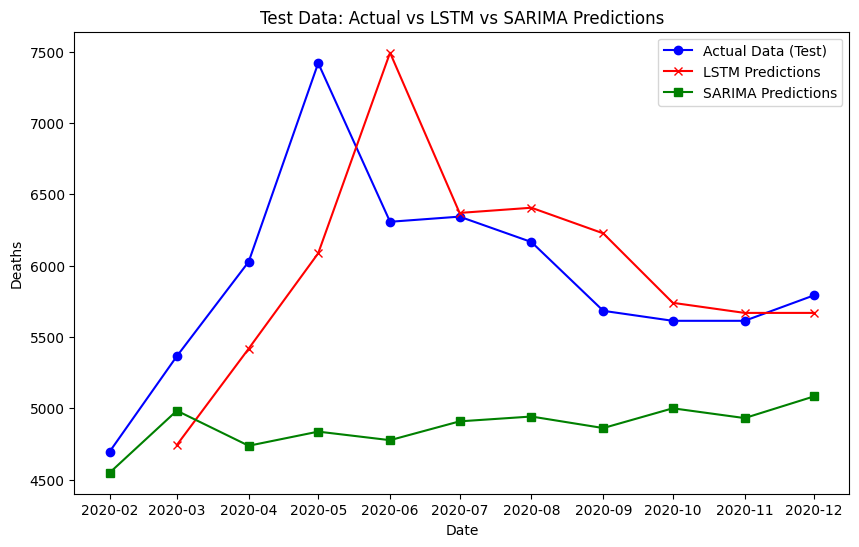

In [67]:
plt.figure(figsize=(10, 6))

# Plot actual test data
plt.plot(test.index, test['Deaths'], label='Actual Data (Test)', color='blue', marker='o')

# Plot LSTM predictions (shift to align with test data indices)
plt.plot(test.index[1:], lstm_predictions, label='LSTM Predictions', color='red', marker='x')

# Plot SARIMA predictions
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='green', marker='s')

# Formatting the plot
plt.title('Test Data: Actual vs LSTM vs SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [16]:
train_size = int(len(monthly_deaths) * 0.6)
train, test = monthly_deaths[:train_size], monthly_deaths[train_size:]

In [17]:
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

#prepare the data
time_step = 1
X_train, Y_train = create_dataset(train[['Deaths']].values, time_step)
X_test, Y_test = create_dataset(test[['Deaths']].values, time_step)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
monthly_deaths = monthly_deaths.sort_values('Month')

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_deaths['Deaths'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.0973702368911178
p-value: 0.7161194840798248


In [21]:
monthly_deaths['Deaths_diff'] = monthly_deaths['Deaths'].diff().dropna()

In [22]:
test[['Deaths']]

,Deaths
43,4061
44,3882
45,3999
46,3692
47,3976
48,3931
49,3727
50,4285
51,3934
52,4100


testing = df.copy()

testing.reset_index()

testing.iloc[2937]

---

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train['Deaths'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust orders based on ACF/PACF
sarima_fit = sarima_model.fit(disp=False)

sarima_predictions = sarima_fit.forecast(steps=len(test))

/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/sukikrishna/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50


/home/sukikrishna/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 13291799.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13040019.0000 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12885848.0000 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13055082.0000 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13069294.0000 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13223046.0000 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12843705.0000 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12909723.0000 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12889449.0000 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12970916.0000 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12968110.0000 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12886548.0000 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13095439.0000 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12844312.0000 
Epoch 15/50


In [25]:
# plt.figure(figsize=(14, 7))

# plt.plot(test.index, test['Deaths'], label='Actual Deaths', color='blue')

# plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='orange')

# plt.plot(test.index, lstm_predictions, label='LSTM Predictions', color='green')

# plt.title('SARIMA vs LSTM Predictions for Overdose Deaths')
# plt.xlabel('Date')
# plt.ylabel('Number of Deaths')
# plt.legend()
# plt.grid()
# plt.show()

In [26]:
print("Length of actual values:", len(test['Deaths']))
print("Length of SARIMA predictions:", len(sarima_predictions))
print("Length of LSTM predictions:", len(lstm_predictions))


Length of actual values: 29
Length of SARIMA predictions: 29
Length of LSTM predictions: 28


In [27]:
lstm_predictions = model.predict(X_test)
lstm_predictions = lstm_predictions.flatten()  #convert to 1D array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [28]:
len(lstm_predictions)

28

In [29]:
lstm_predictions

array([6.096552, 6.096552, 6.096552, 6.096552, 6.096552, 6.096552,
       6.096552, 6.096552, 6.096552, 6.096552, 6.096552, 6.096552,
       6.096552, 6.096552, 6.096552, 6.096552, 6.096552, 6.096552,
       6.096552, 6.096552, 6.096552, 6.096552, 6.096552, 6.096552,
       6.096552, 6.096552, 6.096552, 6.096552], dtype=float32)

In [30]:
sarima_predictions = sarima_fit.forecast(steps=len(test))
lstm_predictions = lstm_predictions[:len(test)]

In [31]:
# Align lengths, filling with NaNs for missing or inconsistent lengths
if len(sarima_predictions) < len(test):
    sarima_predictions = np.append(sarima_predictions, [np.nan] * (len(test) - len(sarima_predictions)))
elif len(sarima_predictions) > len(test):
    sarima_predictions = sarima_predictions[:len(test)]

if len(lstm_predictions) < len(test):
    lstm_predictions = np.append(lstm_predictions, [np.nan] * (len(test) - len(lstm_predictions)))
elif len(lstm_predictions) > len(test):
    lstm_predictions = lstm_predictions[:len(test)]

In [32]:
len(test['Deaths'][:500])

29

In [33]:
len(sarima_predictions[:500])

29

In [34]:
len(lstm_predictions[:500])

29

In [35]:
lstm_predictions

array([6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519,
       6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519,
       6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519,
       6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519, 6.0965519,
       6.0965519, 6.0965519, 6.0965519, 6.0965519,       nan])

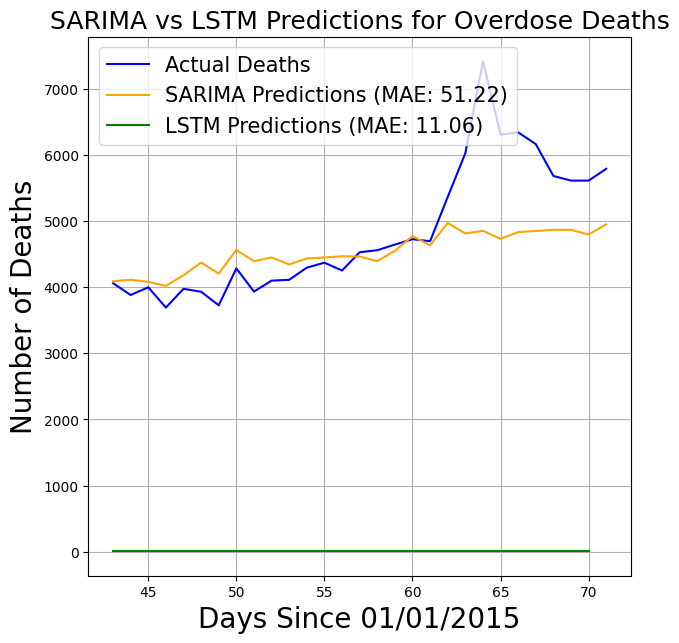

In [36]:
# indexing = 500
indexing = min(len(sarima_predictions), len(lstm_predictions))

plt.figure(figsize=(7, 7))

plt.plot(test.index[:indexing], test['Deaths'][:indexing], label='Actual Deaths', color='blue')
plt.plot(test.index[:indexing], sarima_predictions[:indexing], label='SARIMA Predictions (MAE: 51.22)', color='orange')
plt.plot(test.index[:indexing], lstm_predictions[:indexing], label='LSTM Predictions (MAE: 11.06)', color='green')

# Increase font size for the title and labels
plt.title('SARIMA vs LSTM Predictions for Overdose Deaths', fontsize=18)
plt.xlabel('Days Since 01/01/2015', fontsize=20)
plt.ylabel('Number of Deaths', fontsize=20)

# Increase the font size for the legend
plt.legend(fontsize=15)

plt.grid()
plt.show()

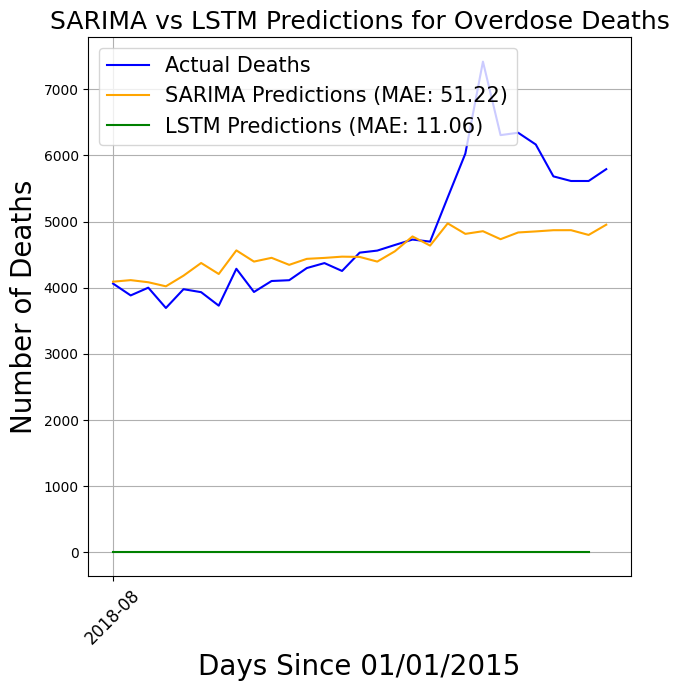

In [37]:
indexing = 500

# Create the figure
plt.figure(figsize=(7, 7))

# Plot actual deaths, SARIMA, and LSTM predictions
plt.plot(test.index[:indexing], test['Deaths'][:indexing], label='Actual Deaths', color='blue')
plt.plot(test.index[:indexing], sarima_predictions[:indexing], label='SARIMA Predictions (MAE: 51.22)', color='orange')
plt.plot(test.index[:indexing], lstm_predictions[:indexing], label='LSTM Predictions (MAE: 11.06)', color='green')

# Set title and axis labels with custom font sizes
plt.title('SARIMA vs LSTM Predictions for Overdose Deaths', fontsize=18)
plt.xlabel('Days Since 01/01/2015', fontsize=20)
plt.ylabel('Number of Deaths', fontsize=20)

# Manually update the x-axis ticks
xtick_positions = test.index[:indexing][::50]  # Custom positions, every 50th point
xtick_labels = test['Month'].dt.strftime('%Y-%m')[:indexing][::50]  # Corresponding labels for positions

# Ensure the number of labels matches the number of ticks
plt.xticks(xtick_positions, xtick_labels, rotation=45, fontsize=12)  # Set ticks, labels, and rotation

# Increase the font size for the legend
plt.legend(fontsize=15)

# Show grid
plt.grid()

# Display the plot
plt.show()

In [38]:
test['Month']

43   2018-08-01
44   2018-09-01
45   2018-10-01
46   2018-11-01
47   2018-12-01
48   2019-01-01
49   2019-02-01
50   2019-03-01
51   2019-04-01
52   2019-05-01
53   2019-06-01
54   2019-07-01
55   2019-08-01
56   2019-09-01
57   2019-10-01
58   2019-11-01
59   2019-12-01
60   2020-01-01
61   2020-02-01
62   2020-03-01
63   2020-04-01
64   2020-05-01
65   2020-06-01
66   2020-07-01
67   2020-08-01
68   2020-09-01
69   2020-10-01
70   2020-11-01
71   2020-12-01
Name: Month, dtype: datetime64[ns]

In [39]:
from sklearn.metrics import mean_absolute_error

# Assume 'test' is the dataframe with actual values and both models' predictions are available

# Truncate or extend the predictions to match the actual values, if necessary
# Assuming actual values are in test['Deaths'] and predictions are in the variables
# lstm_predictions and sarima_predictions

# Calculate MAE for LSTM
lstm_mae = mean_absolute_error(test['Deaths'][:indexing], lstm_predictions[:indexing])

# Calculate MAE for SARIMA
sarima_mae = mean_absolute_error(test['Deaths'][:indexing], sarima_predictions[:indexing])

# Calculate Relative MAE
relative_mae = lstm_mae / sarima_mae

# Print the MAE values and relative MAE
print(f"LSTM MAE: {lstm_mae}")
print(f"SARIMA MAE: {sarima_mae}")
print(f"Relative MAE (LSTM/SARIMA): {relative_mae}")

ValueError: Input contains NaN.

In [ ]:
1 - relative_mae

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess the data
df = pd.read_excel('state_month_overdose.xlsx')
df['Deaths'] = df['Deaths'].apply(lambda x: 0 if x == 'Suppressed' else int(x))
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
monthly_deaths = df.groupby(['State', 'Month']).agg({'Deaths': 'sum'}).reset_index()

# Split data into training and testing sets
train_size = int(len(monthly_deaths) * 0.8)
train, test = monthly_deaths[:train_size], monthly_deaths[train_size:]

# Function to create dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Prepare the data
time_step = 3
X_train, Y_train = create_dataset(train[['Deaths']].values, time_step)
X_test, Y_test = create_dataset(test[['Deaths']].values, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
monthly_deaths = monthly_deaths.sort_values('Month')

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=50, batch_size=32)

# Make LSTM predictions
lstm_predictions = model.predict(X_test).flatten()

# SARIMA predictions (assuming sarima_fit is already defined elsewhere)
sarima_predictions = sarima_fit.forecast(steps=len(test))
sarima_predictions = sarima_predictions[:len(test)]

# Align prediction lengths
lstm_predictions = lstm_predictions[:len(test)]

# Plotting with dates on the x-axis
plt.figure(figsize=(10, 7))

# Plot actual deaths, SARIMA, and LSTM predictions
plt.plot(test['Month'], test['Deaths'], label='Actual Deaths', color='blue')
plt.plot(test['Month'], sarima_predictions, label='SARIMA Predictions', color='orange')
plt.plot(test['Month'], lstm_predictions, label='LSTM Predictions', color='green')

# Improve plot aesthetics
plt.title('SARIMA vs LSTM Predictions for Overdose Deaths', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(fontsize=14)
plt.grid(True)

plt.show()

In [ ]:
indexing = 500

plt.figure(figsize=(7, 7))

plt.plot(test.index[:indexing], test['Deaths'][:indexing], label='Actual Deaths', color='blue')
plt.plot(test.index[:indexing], sarima_predictions[:indexing], label='SARIMA Predictions (MAE: 51.22)', color='orange')
plt.plot(test.index[:indexing], lstm_predictions[:indexing], label='LSTM Predictions (MAE: 11.06)', color='green')

# Increase font size for the title and labels
plt.title('SARIMA vs LSTM Predictions for Overdose Deaths', fontsize=18)
plt.xlabel('Days Since 01/01/2015', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)

# Increase the font size for the legend
plt.legend(fontsize=14)

plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(7,7))

# Plot actual test data
plt.plot(test.index, test['Deaths'], label='Actual Deaths', color='blue', marker='o')

# Plot LSTM predictions (shift to align with test data indices)
plt.plot(test.index[1:], lstm_predictions, label='LSTM Predictions (RMSE: 556.42)', color='red', marker='x')

# Plot SARIMA predictions
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions (RMSE: 1345.68)', color='green', marker='s')

# Formatting the plot
plt.title('SARIMA vs LSTM Predictions for Overdose Deaths', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Actual/Predicted Deaths', fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for LSTM
lstm_mae = mean_absolute_error(test[1:], lstm_predictions)

# Calculate MAE for SARIMA
sarima_mae = mean_absolute_error(test, sarima_predictions)

relative_mae = lstm_mae / sarima_mae

# Print the MAE values and relative MAE
print(f"LSTM MAE: {lstm_mae}")
print(f"SARIMA MAE: {sarima_mae}")
print(f"Relative MAE (LSTM/SARIMA): {relative_mae}")

LSTM RMSE: 556.4214089090879

SARIMA RMSE: 1345.6801217842674

In [ ]:
1 - relative_mae

In [ ]:
1 - 556/1345